In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn import datasets
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split
InteractiveShell.ast_node_interactivity = "all"


In [3]:
#import xgboost as xgb

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df=pd.read_csv("test_truncated.txt",delimiter="\t")


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(5)
df.shape

,dicomstudyinstanceuid,dicomstationname,dicombodypartexamined,examsubspeciality,dicommodality,dicommanufacturer,isitesendingaetitle,studyperformedduration,procedurecodevalue,procedurecodemeaning
0,1.2.276.0.26.1.1.1.2.2016.331.83557.4140867,KP WCR PDS2,NaN,NaN,US,GE Healthcare Austria GmbH & Co OG,CNWCRGEVP601,1477,76801,"ECHO OB, 1ST TRIM, SINGLETON"
1,1.2.276.0.26.1.1.1.2.2016.360.461.6577827,US3,NaN,NaN,US,GE Healthcare Austria GmbH & Co OG,CNWCRGEVP601,626,76801,"ECHO OB, 1ST TRIM, SINGLETON"
2,1.2.276.0.26.1.1.1.2.2016.360.592.7570814,KP WCR PDS2,NaN,NaN,US,GE Healthcare Austria GmbH & Co OG,CNWCRGEVP601,1175,76801,"ECHO OB, 1ST TRIM, SINGLETON"
3,1.2.276.0.26.1.1.1.2.2016.377.72991.2322371,US3,NaN,NaN,US,GE Healthcare Austria GmbH & Co OG,CNWCRGEVP601,702,76805,"ECHO OB, B-SCAN/RL TM COMPLETE"
4,1.2.392.200036.9116.6.18.15542006.1041.2016092...,StationName,NaN,NaN,US,TOSHIBA_MEC_US,CNDRVA5002006,176,76805,"ECHO OB, B-SCAN/RL TM COMPLETE"


(99999, 10)

In [5]:
## start data cleaning for missing values , count how many missing values we have for each variable
missing_count = df.apply(lambda x: sum(x.isnull()),axis=0)
print(missing_count)

dicomstudyinstanceuid         0
dicomstationname           1413
dicombodypartexamined     29783
examsubspeciality         99872
dicommodality                 0
dicommanufacturer             0
isitesendingaetitle           0
studyperformedduration        0
procedurecodevalue            0
procedurecodemeaning          0
dtype: int64


In [6]:
## check data type,## check data type for each column, 'Object' means String type 
for y in df.columns:
    print(y)
    print(df[y].dtype)

dicomstudyinstanceuid
object
dicomstationname
object
dicombodypartexamined
object
examsubspeciality
object
dicommodality
object
dicommanufacturer
object
isitesendingaetitle
object
studyperformedduration
int64
procedurecodevalue
int64
procedurecodemeaning
object


In [7]:
## drop variables with too much missing value, and fill missing value as "Unknown"for some other variables
df.drop(['dicomstudyinstanceuid','examsubspeciality','procedurecodemeaning'],axis=1, inplace=True)
df['dicomstationname'].fillna('Unknown',inplace=True)
df['dicombodypartexamined'].fillna('Unknown',inplace=True)
df['dicommanufacturer'].fillna('Philips Medical Systems',inplace=True)

## transform numberic to string type
df['procedurecodevalue']=df['procedurecodevalue'].astype(object)


In [8]:
## collect String variable names
var_norminal=[]
for col in df.columns.values:
    #print(col)
    if df[col].dtypes == 'object':
        print("String")
        print(col)
        var_norminal.append(col)

print(var_norminal)

String
dicomstationname
String
dicombodypartexamined
String
dicommodality
String
dicommanufacturer
String
isitesendingaetitle
String
procedurecodevalue
['dicomstationname', 'dicombodypartexamined', 'dicommodality', 'dicommanufacturer', 'isitesendingaetitle', 'procedurecodevalue']


In [9]:
## transfrom catrgorical variables into dummy variables 
df_norminal = pd.get_dummies( df[var_norminal] )
df_norminal.head()
df_norminal.dtypes

,dicomstationname_7596-NE2D-184,dicomstationname_7596-NE2D-264,dicomstationname_925813PORT4,dicomstationname_AMCMAM2,dicomstationname_AMCMAM3,dicomstationname_ANT-CR-01,dicomstationname_ANTMAM1,dicomstationname_AX1028116330078,dicomstationname_CNBSRHOLOGIC,dicomstationname_CNDRV_CT0886199,...,procedurecodevalue_76801,procedurecodevalue_76805,procedurecodevalue_76816,procedurecodevalue_76856,procedurecodevalue_77055,procedurecodevalue_77056,procedurecodevalue_77057,procedurecodevalue_78815,procedurecodevalue_93880,procedurecodevalue_93971
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


dicomstationname_7596-NE2D-184       uint8
dicomstationname_7596-NE2D-264       uint8
dicomstationname_925813PORT4         uint8
dicomstationname_AMCMAM2             uint8
dicomstationname_AMCMAM3             uint8
dicomstationname_ANT-CR-01           uint8
dicomstationname_ANTMAM1             uint8
dicomstationname_AX1028116330078     uint8
dicomstationname_CNBSRHOLOGIC        uint8
dicomstationname_CNDRV_CT0886199     uint8
dicomstationname_CNDRV_CT1005404     uint8
dicomstationname_CNMTZ_CR1039553     uint8
dicomstationname_CNPLS_CT0827402     uint8
dicomstationname_CNWCR-CR870900      uint8
dicomstationname_CNWCR_CR1073363     uint8
dicomstationname_CNWCR_CR839851      uint8
dicomstationname_CNWCR_CT0938620     uint8
dicomstationname_CNWCR_CT1064607     uint8
dicomstationname_DIDI RM2 ANT        uint8
dicomstationname_DIDI Rm4            uint8
dicomstationname_DIDI_RM 1_ANT       uint8
dicomstationname_DRV-CR850ED         uint8
dicomstationname_DRV-CR975-01        uint8
dicomstatio

In [10]:
## split the data into train and test, df_norminal is dataframe for X, df['studyperformedduration'] is our traget variable
X_train, X_test, y_train, y_test = train_test_split(df_norminal, df['studyperformedduration'], train_size=0.8, random_state=42)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(79999, 288)

(20000, 288)

(79999,)

(20000,)

In [11]:
X_train.head(5)

,dicomstationname_7596-NE2D-184,dicomstationname_7596-NE2D-264,dicomstationname_925813PORT4,dicomstationname_AMCMAM2,dicomstationname_AMCMAM3,dicomstationname_ANT-CR-01,dicomstationname_ANTMAM1,dicomstationname_AX1028116330078,dicomstationname_CNBSRHOLOGIC,dicomstationname_CNDRV_CT0886199,...,procedurecodevalue_76801,procedurecodevalue_76805,procedurecodevalue_76816,procedurecodevalue_76856,procedurecodevalue_77055,procedurecodevalue_77056,procedurecodevalue_77057,procedurecodevalue_78815,procedurecodevalue_93880,procedurecodevalue_93971
64470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27614,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train_X, train_y)

In [14]:
#model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
#model.fit(X_train, y_train,verbose=True)

In [17]:
## do a quick RF with fixed hyperparameter
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [18]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
#print(f'Test data R-2 score: {test_score:>5.3}')
#print(f'Test data Spearman correlation: {spearman[0]:.3}')
#print(f'Test data Pearson correlation: {pearson[0]:.3}')

In [24]:
## performance measurement for Random forecast regressgor
print('Out-of-bag R-2 score estimate:')
print(rf.oob_score_)
print('Test data R-2 score:')
print(test_score)
print('Test data Spearman correlation:')
print(spearman[0])
print('Test data Pearson correlation:')
print(pearson[0])

Out-of-bag R-2 score estimate:
0.67555435472
Test data R-2 score:
0.691858639455
Test data Spearman correlation:
0.888590281008
Test data Pearson correlation:
0.831930912254


In [12]:
## test lasso regression
import sklearn.cross_validation as cv
from sklearn import linear_model

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
## search for the best Alphas value for Lasso regression
alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

0.0001 [ -1.66935621e+02  -2.29691082e+02  -2.10317598e+02   1.55716067e+02
   4.98997732e+01   2.33020554e+01  -3.74051129e+01  -3.32899719e+02
   5.94428427e+01  -9.54427613e+01  -2.08710893e+01  -3.46587038e+02
  -1.82959201e+01   1.76080693e+03  -3.08814353e+02  -2.72177332e+02
  -1.41933501e+02  -1.84370687e+02  -4.38341892e+02  -4.61722710e+02
  -4.10853089e+02  -2.26197895e+02   1.10172762e+02  -2.26446635e+02
   1.14767972e+03  -5.00863792e+02  -5.62140482e+02  -5.64004584e+02
  -3.57505646e+02   5.23825623e+02   7.02987775e+02   9.39388414e+02
   7.39220611e+02  -3.13988994e+02  -2.02815531e+02  -1.55817636e+02
  -4.87232848e+02  -4.14352429e+02   7.87948804e+02   8.13676198e+02
   6.83801426e+02   6.17297226e+02   6.77891272e+02  -4.68546329e+01
  -7.21556679e+01  -4.24069701e+02   4.63709874e+03  -1.97059422e+02
  -2.81464705e+02  -1.46278029e+02   7.72087140e+02   1.24965630e+03
   6.46318961e+02   7.14987720e+02   5.24732479e+02  -1.40191219e+02
  -2.75233623e+02   8.24577

Lasso(alpha=0.00021544346900318845, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.00021544346900318845, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.000215443469003 [ -1.62562309e+02  -2.19420437e+02  -2.07549524e+02   1.31937314e+02
   2.44019185e+01   1.80334725e+01  -5.24712637e+01  -3.33442340e+02
   2.87268089e+01  -8.97686949e+01  -1.51856753e+01  -3.33301653e+02
  -1.26176701e+01   1.75591682e+03  -3.09683116e+02  -2.74012483e+02
  -1.37583576e+02  -1.78914014e+02  -4.37666203e+02  -4.61253346e+02
  -4.10424112e+02  -2.24389243e+02   9.55648390e+01  -2.26378211e+02
   1.12138097e+03  -5.05788974e+02  -5.47082949e+02  -5.57791382e+02
  -3.57349251e+02   5.01779297e+02   7.00041003e+02   9.35284024e+02
   6.76968973e+02  -3.12395888e+02  -1.77809839e+02  -1.31361770e+02
  -4.22226515e+02  -3.75461585e+02   7.84677644e+02   8.10339674e+02
   6.72450801e+02   6.05143612e+02   6.62890517e+02  -2.97752819e+01
  -5.50616280e+01  -3.77038008e+02   4.63917472e+03  -1.74639492e+02
  -2.51342265e+02  -1.24670417e+02   7.71460264e+02   1.18746121e+03
   6.26570396e+02   6.92924929e+02   5.02341661e+02  -1.27835690e+02
  -2.56657997e+0

Lasso(alpha=0.00046415888336127773, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.00046415888336127773, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.000464158883361 [ -1.50096390e+02  -2.05947287e+02  -1.98861280e+02   1.04276742e+02
   1.40359606e+00   1.68740193e+01  -4.30779887e+01  -3.32392628e+02
   1.92545060e+01  -7.74189671e+01  -2.81121433e+00  -3.07704835e+02
  -2.58629861e-01   1.75491547e+03  -3.06060781e+02  -2.72327783e+02
  -1.26245276e+02  -1.65422568e+02  -4.31915124e+02  -4.55541651e+02
  -4.04842288e+02  -2.15715904e+02   8.24612216e+01  -2.20367140e+02
   1.09845725e+03  -5.08549287e+02  -5.34834477e+02  -5.40682731e+02
  -3.51279269e+02   4.57754896e+02   6.95375189e+02   9.27572591e+02
   6.01655213e+02  -3.06097391e+02  -1.36555721e+02  -8.69016312e+01
  -3.86330210e+02  -3.46098501e+02   7.78529807e+02   8.00247603e+02
   6.49624477e+02   5.76599292e+02   6.34349232e+02   3.23472806e+00
  -2.19012167e+01  -2.89205888e+02   4.64489106e+03  -1.56542801e+02
  -2.28231482e+02  -1.00943586e+02   7.69798882e+02   1.11230516e+03
   5.85330560e+02   6.48860509e+02   4.57569655e+02  -9.19560135e+01
  -2.20783176e+0

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

0.001 [ -1.25160420e+02  -1.79424388e+02  -1.84080985e+02   1.13052233e+02
   1.24976265e+01   1.83889209e+01  -1.65352038e+01  -3.31803293e+02
   2.75261139e+01  -7.00178356e+01   3.79437498e-02  -2.34194621e+02
   2.94386404e-02   1.75850459e+03  -2.42782282e+02  -2.23738293e+02
  -1.14264475e+02  -1.50973990e+02  -4.22750176e+02  -4.46918397e+02
  -3.96030177e+02  -1.99146957e+02   9.68484964e+01  -1.90021374e+02
   1.06269119e+03  -4.87853681e+02  -5.10047361e+02  -5.07644611e+02
  -3.37736789e+02   3.63871091e+02   6.34282313e+02   8.91985214e+02
   4.57196133e+02  -2.95643612e+02  -1.09992670e+02  -6.03416063e+01
  -3.52337099e+02  -3.07544759e+02   7.42907842e+02   7.64560100e+02
   6.14070011e+02   5.15533080e+02   5.73279115e+02   2.53183642e+01
   8.36205596e-02  -2.16158197e+02   4.65373553e+03  -1.31392581e+02
  -1.89889147e+02  -7.43991275e+01   7.62922829e+02   9.68125243e+02
   5.08390800e+02   5.54869025e+02   3.62062536e+02  -1.85795077e+01
  -1.47439817e+02   8.560662

Lasso(alpha=0.0021544346900318821, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0021544346900318821, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.00215443469003 [ -7.62481062e+01  -1.13542177e+02  -1.57454322e+02   1.34611124e+02
   3.61308707e+01   3.18687156e+01   0.00000000e+00  -3.32283811e+02
   5.10461641e+01  -5.18354783e+01   2.97027887e+00  -1.39325022e+02
   2.66360792e+00   1.77280059e+03  -1.48120983e+02  -1.28942419e+02
  -9.61574638e+01  -1.32858183e+02  -4.04633638e+02  -4.22913092e+02
  -3.77745372e+02  -1.25853242e+02   1.29168240e+02  -1.14915086e+02
   9.86565270e+02  -4.35318088e+02  -4.57442065e+02  -4.47701113e+02
  -3.05807786e+02   1.81557757e+02   5.22626979e+02   8.16239507e+02
   1.40006340e+02  -2.76848725e+02  -7.02519566e+01  -2.04187286e+01
  -2.86213344e+02  -2.31962181e+02   6.66998863e+02   6.88599505e+02
   5.38387348e+02   4.03912098e+02   4.61661383e+02   2.50567179e+01
   0.00000000e+00  -1.22341620e+02   4.67195609e+03  -8.91634025e+01
  -1.14576056e+02  -3.50156340e+01   7.42785312e+02   6.51641061e+02
   3.37871939e+02   3.72350916e+02   1.76269510e+02   1.18833498e+01
  -5.30403026e+01

Lasso(alpha=0.0046415888336127772, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0046415888336127772, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.00464158883361 [  1.63486033e+01  -1.93521759e+01  -1.18276254e+02   1.58556372e+02
   6.14638409e+01   5.80833722e+01   0.00000000e+00  -2.78612908e+02
   7.74233647e+01  -1.12968840e+01   1.93014526e+01  -6.80824220e+01
   1.75849527e+01   1.80153619e+03  -7.71124061e+01  -5.72545922e+01
  -5.57855388e+01  -9.24679273e+01  -3.34234108e+02  -3.33638882e+02
  -3.05493408e+02  -4.05140722e+00   1.82686150e+02  -0.00000000e+00
   8.36640874e+02  -3.45988845e+02  -3.68020054e+02  -3.57355367e+02
  -2.41068648e+02  -0.00000000e+00   3.09619473e+02   6.67118934e+02
  -0.00000000e+00  -1.94348489e+02  -1.56227783e+01   0.00000000e+00
  -1.81674008e+02  -1.08829717e+02   5.17538253e+02   5.39027987e+02
   3.89265963e+02   1.91047351e+02   2.48765516e+02   2.44500995e+01
   0.00000000e+00  -4.40118199e+01   4.70617100e+03  -3.09821411e+01
   0.00000000e+00  -0.00000000e+00   6.83417491e+02   5.09710998e+02
  -5.27962316e+00   1.89716267e+02   0.00000000e+00   3.48170871e+01
   1.68514081e+01

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

0.01 [  3.59770117e+01  -0.00000000e+00  -0.00000000e+00   1.80724434e+02
   8.46359282e+01   6.96492722e+01   0.00000000e+00  -1.55669926e+02
   1.03426167e+02  -0.00000000e+00   4.84849266e+01  -6.68531769e+01
   4.80620877e+01   1.81956130e+03  -7.59366292e+01  -5.50051015e+01
  -2.02992188e+01  -5.50613317e+01  -2.03607274e+02  -2.03031076e+02
  -1.74721565e+02  -0.00000000e+00   2.18163171e+02  -0.00000000e+00
   6.03333417e+02  -2.14258018e+02  -2.37008393e+02  -2.26697469e+02
  -1.10299365e+02  -2.99371992e+01   1.16808173e+02   4.35153713e+02
  -0.00000000e+00  -6.14011752e+01  -0.00000000e+00  -0.00000000e+00
  -7.40454745e+01  -6.03471829e+01   2.84157171e+02   3.05498299e+02
   1.56931612e+02  -0.00000000e+00   5.61193958e+01   2.31399016e+01
   0.00000000e+00  -5.78146888e+00   4.74229767e+03  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   4.83899085e+02   5.09183487e+02
  -6.36204845e+01   1.56973642e+02  -0.00000000e+00   5.42480625e+01
   1.61162890e+01   9.5907850

Lasso(alpha=0.021544346900318822, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.021544346900318822, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.0215443469003 [  3.60900591e+01  -0.00000000e+00   0.00000000e+00   1.88863829e+02
   9.41544799e+01   7.72429756e+01   0.00000000e+00  -4.50524466e+01
   1.13051262e+02  -8.51936479e+00   0.00000000e+00  -1.85537809e+01
   2.15707687e+00   1.82093955e+03  -2.96516940e+01  -6.92637460e+00
  -2.90242232e+01  -6.07886354e+01  -5.33112801e+01  -5.27352986e+01
  -2.41200493e+01  -0.00000000e+00   2.39704360e+02  -0.00000000e+00
   3.69563023e+02  -6.41826655e+01  -8.59682424e+01  -6.25311958e+01
   4.64170205e+00  -6.78709828e+01   1.13656150e+02   2.04952418e+02
  -9.49120632e+00   1.48950732e+01  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -1.54658925e+01   5.26372861e+01   7.35858928e+01
  -4.88398565e+01  -0.00000000e+00   5.33642925e+01   2.02588423e+01
   0.00000000e+00  -0.00000000e+00   4.65470704e+03  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   1.40819773e+02   4.85901175e+02
  -1.83480449e+01   1.14196150e+02  -0.00000000e+00   6.52555571e+01
   1.57619650e+01 

Lasso(alpha=0.046415888336127774, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# do a simple LASSO with fixed Alpha value
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)

In [13]:
from sklearn.metrics import r2_score


In [24]:
y_pred_lasso

array([ 1358.35385302,    67.49999359,   303.972296  , ...,  1047.87679193,
        1158.01941825,   152.13244018])

In [25]:
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data for LASSO : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data for LASSO : 0.677832


In [16]:
## do a elastic net regression with fixed hyper parameter
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.534431


In [23]:
from sklearn.metrics import mean_squared_error
#train_error = mean_squared_error(y_train, model.predict(pred_train))
test_error = mean_squared_error(y_test, y_pred_lasso)
#print (‘training data MSE’)
#print(train_error)
print('test data MSE on Lasso')
print(test_error)

test_error = mean_squared_error(y_test, y_pred_enet)
#print (‘training data MSE’)
#print(train_error)
print('test data MSE on Eent')
print(test_error)


test data MSE on Lasso
183868.797207
test data MSE on Eent
265711.332438


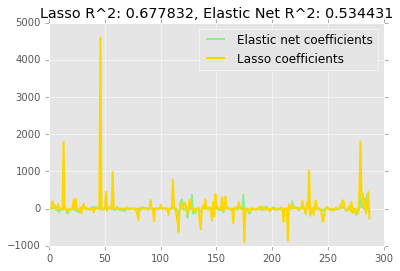

In [18]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()